# Data Science Jobs Salary Prediction Linear Regression

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

In [2]:
#Load Dataset

salaries_data = pd.read_csv('Datasets/ds_salaries_clean.csv')
salaries_data

,Unnamed: 0,Year,Company,City,State,Title,Salary Level,Area,Total Annual Compensation,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Masters Degree,Bachelors Degree,Doctorate Degree,Highschool,Some College
0,0,2021,Accenture,Indianapolis,IN,Data Scientist,1,Data,16000,0,0.0,13000,0,3000,0,1,0,0,0
1,1,2021,Bank of America,Charlotte,NC,Data Scientist,1,data science,15000,1,1.0,15000,0,3000,0,0,0,0,0
2,2,2020,PayPal,Chennai,TN,Data Scientist,1,Data,30000,4,2.0,22000,8000,0,0,0,0,0,0
3,3,2021,Verizon,Chennai,TN,Data Scientist,1,Analytics,35000,8,1.0,32000,1000,3000,1,0,0,0,0
4,4,2021,Accenture,Dublin,NH,Data Scientist,1,General,34000,0,0.0,34000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,1760,2021,Capgemini,San Antonio,TX,Data Scientist,3,FinServ,400000,25,3.0,310000,0,90000,0,0,1,0,0
1761,1761,2020,Apple,Redmond,WA,Data Scientist,3,ML / AI,645000,7,2.0,375000,180000,90000,1,0,1,0,0
1762,1762,2019,Goldman Sachs,Illinois City,IL,Data Scientist,3,Web Development (Front-End),510000,8,2.0,450000,50000,10000,0,0,1,0,0
1763,1763,2020,Apple,Los Angeles,CA,Data Scientist,3,iOS,480000,20,4.0,480000,0,0,1,0,0,0,0


In [3]:
salaries_data.describe()

,Unnamed: 0,Year,Salary Level,Total Annual Compensation,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Masters Degree,Bachelors Degree,Doctorate Degree,Highschool,Some College
count,1765.00000,1765.000000,1765.000000,1765.00000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.0,1765.000000
mean,882.00000,2020.150142,2.024929,221324.07932,4.906516,1.985184,149778.470255,51742.776204,19557.507082,0.308215,0.089518,0.166006,0.0,0.000567
std,509.65593,0.840855,0.403291,106130.96407,3.983211,2.245082,40794.243277,68463.403752,21863.436860,0.461887,0.285571,0.372191,0.0,0.023803
min,0.00000,2018.000000,1.000000,15000.00000,0.000000,0.000000,13000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,441.00000,2020.000000,2.000000,153000.00000,2.000000,0.000000,125000.000000,4000.000000,6000.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,882.00000,2020.000000,2.000000,200000.00000,4.000000,2.000000,150000.000000,34000.000000,15000.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,1323.00000,2021.000000,2.000000,260000.00000,7.000000,3.000000,170000.000000,68000.000000,27000.000000,1.000000,0.000000,0.000000,0.0,0.000000
max,1764.00000,2021.000000,3.000000,1000000.00000,30.000000,20.000000,630000.000000,700000.000000,350000.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [4]:
ds = pd.read_csv("Datasets/ds_salaries_clean.csv", usecols = ['Salary Level', 'Total Annual Compensation', 'Years at Company', 'Years of Experience', 'Masters Degree', 'Bachelors Degree', 'Doctorate Degree', 'Highschool', 'Some College'])
ds

,Salary Level,Total Annual Compensation,Years of Experience,Years at Company,Masters Degree,Bachelors Degree,Doctorate Degree,Highschool,Some College
0,1,16000,0,0.0,0,1,0,0,0
1,1,15000,1,1.0,0,0,0,0,0
2,1,30000,4,2.0,0,0,0,0,0
3,1,35000,8,1.0,1,0,0,0,0
4,1,34000,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1760,3,400000,25,3.0,0,0,1,0,0
1761,3,645000,7,2.0,1,0,1,0,0
1762,3,510000,8,2.0,0,0,1,0,0
1763,3,480000,20,4.0,1,0,0,0,0


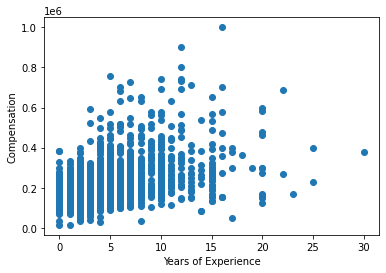

In [5]:
plt.scatter( ds['Years of Experience'] ,ds['Total Annual Compensation'] )
plt.xlabel('Years of Experience')
plt.ylabel('Compensation')
plt.show()

In [6]:
X = ds.drop('Total Annual Compensation',axis=1)
y = ds['Total Annual Compensation']

In [7]:
X.shape , y.shape

((1765, 8), (1765,))

In [8]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,random_state=1764,test_size=0.5)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((882, 8), (883, 8), (882,), (883,))

In [9]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [10]:
pred = lr.predict(X_test)
pred

array([181243.34536483, 208045.52512854, 199886.72252518, 224155.11899447,
       187336.50160892, 200625.71804066, 185218.74099611, 199886.72252518,
       195495.30421229, 221829.34704086, 185218.74099611, 264949.13201131,
       270516.48585529, 185426.75233691, 197560.95057156, 381656.68730968,
        45449.92167906, 237673.26410102, 241096.75822362, 220179.72336319,
       419651.24022634, 275381.59231475, 241720.79224603, 547106.39707709,
       402365.71082931, 234379.56795711, 204070.12949726, 412174.13711034,
       205719.75317493, 125830.8152621 , 224363.13033528, 256998.34074874,
       211812.90941902, 205038.05368756, 195703.31555309, 213404.86763173,
       181243.34536483, 199886.72252518, 230612.18366663, 234171.55661631,
       189194.13662739, 221355.65889429,  37993.73589708, 225955.08854798,
        65742.92251708, 270308.47451449, 228130.51462575, 217380.26326301,
       240680.73554201, 208045.52512854,  53608.72428243,  44034.77788763,
       181243.34536483, 1

In [11]:
Y_test

502     190000
981     280000
656     140000
1111    230000
659     201000
         ...  
43       86000
170     122000
1224    380000
1491    274000
1027    243000
Name: Total Annual Compensation, Length: 883, dtype: int64

In [12]:
diff = Y_test - pred

In [13]:
pd.DataFrame(np.c_[Y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,190000.0,181243.345365,8756.654635
1,280000.0,208045.525129,71954.474871
2,140000.0,199886.722525,-59886.722525
3,230000.0,224155.118994,5844.881006
4,201000.0,187336.501609,13663.498391
...,...,...,...
878,86000.0,23533.765709,62466.234291
879,122000.0,195495.304212,-73495.304212
880,380000.0,198944.897443,181055.102557
881,274000.0,195703.315553,78296.684447


In [14]:
lr.score(X_test , Y_test)

0.4690105518507568

In [15]:
mean_squared_error(Y_test , pred, squared=False)

70696.94238443008

In [16]:
r2_score(Y_test , pred)

0.4690105518507568